plot kd from argo, ws profiles, and ooi array

In [1]:
%pip install --quiet geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
from scipy import stats
import glob
from geopy.distance import geodesic

In [3]:
def matchkd_argo(file_name):
    is2 = pd.read_csv(file_name)# load data
    t = datetime.strptime(file_name[8:22],'%Y%m%d%H%M%S')# strip time from file name
    t = t.replace(tzinfo=timezone.utc)
    tdiff = abs(t - argo['dt_float']) # calculate difference between file time and each argo entry
    
    # find all entries in argo where tdiff<6h
    argo_sub = argo[tdiff<(timedelta(hours=12))]
    rows = argo_sub.index.values
    
    # find all entries in argo where distance is < 10km
    for jj in rows:
        argo_coords = (argo_sub.loc[jj,'lat_float'],argo_sub.loc[jj,'lon_float']) #lat,lon tuple
        dist = np.ones(len(is2))*np.nan
        for kk in range(len(is2)):
            is2_coords = (is2.loc[kk,'latitude'],is2.loc[kk,'longitude'])
            try:
                dist[kk] = geodesic(argo_coords, is2_coords).km
            except:
                continue
        idx = np.argmin(dist)
        if np.min(dist)<10:
            argo.loc[jj,'icesat2_kd'] = is2.loc[idx,'kd']

def matchkd_ooi(file_name):
    is2 = pd.read_csv(file_name)# load data
    t = datetime.strptime(file_name[8:22],'%Y%m%d%H%M%S')# strip time from file name
    t = t.replace(tzinfo=timezone.utc)
    tdiff = abs(t - ooi['time']) # calculate difference between file time and each argo entry
    
    # find all entries in argo where tdiff<6h
    ooi_sub = ooi[tdiff<(timedelta(hours=24))]
    rows = ooi_sub.index.values

    # find all possible matched entries where distance is < 10km
    for jj in rows:
        dist = np.ones(len(is2))*np.nan
        ooi_coords = (ooi_sub.loc[jj,'lat'],ooi_sub.loc[jj,'lon']) #lat,lon tuple
        for kk in range(len(is2)):
            is2_coords = (is2.loc[kk,'latitude'],is2.loc[kk,'longitude'])
            try:
                dist[kk] = geodesic(ooi_coords, is2_coords).km
            except:
                continue
        idx = np.argmin(dist)
        if np.min(dist)<10:
            ooi.loc[jj,'icesat2_kd'] = is2.loc[idx,'kd']

def matchkd_ws(file_name):
    is2 = pd.read_csv(file_name)# load data
    t = datetime.strptime(file_name[8:22],'%Y%m%d%H%M%S')# strip time from file name
    t = t.replace(tzinfo=timezone.utc)
    tdiff = abs(t - ws['time']) # calculate difference between file time and each argo entry
    
    # find all entries in argo where tdiff<6h
    ws_sub = ws[tdiff<(timedelta(hours=24))]
    rows = ws_sub.index.values

    # find all possible matched entries where distance is < 10km
    for jj in rows:
        dist = np.ones(len(is2))*np.nan
        ws_coords = (ws_sub.loc[jj,'lat'],ws_sub.loc[jj,'lon']) #lat,lon tuple
        for kk in range(len(is2)):
            is2_coords = (is2.loc[kk,'latitude'],is2.loc[kk,'longitude'])
            try:
                dist[kk] = geodesic(ws_coords, is2_coords).km
            except:
                continue
        idx = np.argmin(dist)
        if np.min(dist)<10:
            ws.loc[jj,'icesat2_kd'] = is2.loc[idx,'kd']



# def matchkd_ws(file_name):
#     is2 = pd.read_csv(file_name)# load data
#     t = datetime.strptime(file_name[8:22],'%Y%m%d%H%M%S')# strip time from file name
#     t = t.replace(tzinfo=timezone.utc)
#     tdiff = abs(t - ws['time']) # calculate difference between file time and each argo entry
    
#     # find all entries in argo where tdiff<6h
#     ws_sub = ws[tdiff<(timedelta(hours=24))]
#     rows = ws_sub.index.values
#     # find all entries in argo where distance is < 4km
#     is2_coords = (np.nanmean(is2['latitude']),np.nanmean(is2['longitude']))
#     for jj in rows:
#         ws_coords = (ws_sub.loc[jj,'lat'],ws_sub.loc[jj,'lon']) #lat,lon tuple 
#         dist = geodesic(ws_coords, is2_coords).km
#         if dist<100:
#             ws.loc[jj,'icesat2_kd_mean'] = np.nanmean(is2['kd'])
#             ws.loc[jj,'icesat2_kd_std'] = np.nanstd(is2['kd'])


In [4]:
pname = 'results/'
argo = pd.read_csv('data/Dataset_Kd_Paper_2018.csv')
argo["dt_float"] = pd.to_datetime(argo["dt_float"]-719529,unit='d',utc=True).round('s')
# argo['dt_float'] = pd.to_datetime(argo["dt_float"],format='ISO8601').round('s')
argo['icesat2_kd'] = np.nan
fnames = glob.glob(pname+'*Further.csv')

file_name=fnames[0]
is2 = pd.read_csv(file_name)# load data
t = datetime.strptime(file_name[8:22],'%Y%m%d%H%M%S')# strip time from file name
t = t.replace(tzinfo=timezone.utc)
tdiff = abs(t - argo['dt_float']) # calculate difference between file time and each argo entry

# find all entries in argo where tdiff<6h
argo_sub = argo[tdiff<(timedelta(hours=12))]
rows = argo_sub.index.values
# # find all entries in argo where distance is < 10km
jj = rows[0]
argo_coords = (argo_sub.loc[jj,'lat_float'],argo_sub.loc[jj,'lon_float'])
dist = np.ones(len(is2))*np.nan
for kk in range(len(is2)):
    is2_coords = (is2.loc[kk,'latitude'],is2.loc[kk,'longitude'])
    try:
        dist[kk] = geodesic(argo_coords, is2_coords).km
    except:
        continue

# for jj in rows:
#     argo_coords = (argo_sub.loc[jj,'lat_float'],argo_sub.loc[jj,'lon_float']) #lat,lon tuple
#     dist = np.ones(len(is2))*np.nan
#     for kk in range(len(is2)):
#         is2_coords = (is2.loc[kk,'latitude'],is2.loc[kk,'longitude'])
#         try:
#             dist[kk] = geodesic(argo_coords, is2_coords).km
#         except:
#             continue
#     idx = np.argmin(dist)
#     if np.min(dist)<10:
#         argo.loc[jj,'icesat2_kd'] = is2.loc[idx,'kd']


9425


In [17]:
# load argo data:
pname = 'results/'
argo = pd.read_csv('data/Dataset_Kd_Paper_2018.csv')
argo["dt_float"] = pd.to_datetime(argo["dt_float"]-719529,unit='d',utc=True).round('s')
# argo['dt_float'] = pd.to_datetime(argo["dt_float"],format='ISO8601').round('s')
argo['icesat2_kd'] = np.nan
fnames = glob.glob(pname+'*Further.csv')
for file in fnames:
    matchkd_argo(file)


# load ooi data:
ooi = pd.read_csv(pname+'ooi_kdcalculations10m.csv',index_col=0)
ooi['time'] = pd.to_datetime(ooi["time"],format='ISO8601').round('s')
ooi['icesat2_kd'] = np.nan
fnames = glob.glob(pname+'*Further.csv')
for file in fnames:
    matchkd_ooi(file)

# load ws data:
ws = pd.read_csv(pname+'ws_kdcalculations10m.csv',index_col=0)
ws['time'] = pd.to_datetime(ws["time"],format='ISO8601').round('s')
ws['icesat2_kd'] = np.nan
fnames = glob.glob(pname+'*Further.csv')
for file in fnames:
    matchkd_ws(file)



Text(0, 0.5, 'kd from icesat-2')

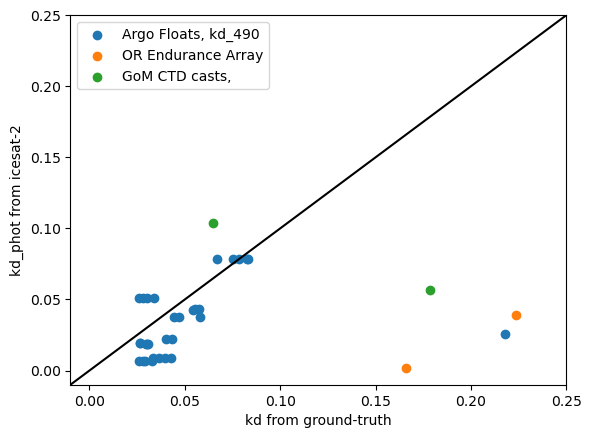

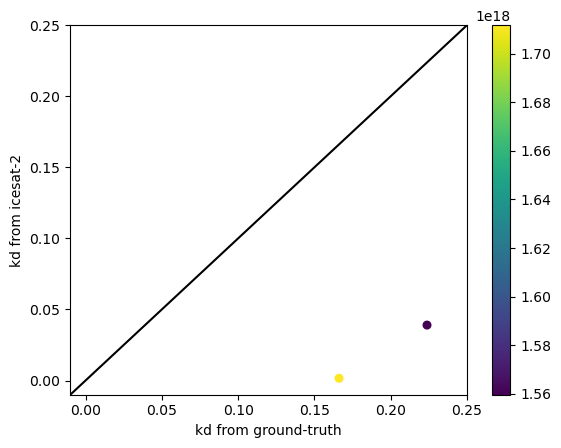

In [18]:
plt.figure()
plt.scatter(argo['kd_490_f'],argo['icesat2_kd'], label = 'Argo Floats, kd_490')
plt.scatter(ooi['kd'],ooi['icesat2_kd'], label = 'OR Endurance Array')
plt.scatter(ws['kd'],ws['icesat2_kd'], label = 'GoM CTD casts, ')
plt.xlim([-0.01,0.25])
plt.ylim([-0.01,0.25])
plt.axline((0, 0), slope=1,c='k')
plt.legend()
plt.xlabel('kd from ground-truth')
plt.ylabel('kd_phot from icesat-2')

plt.figure()
p = plt.scatter(ooi['kd'],ooi['icesat2_kd'],s = 30, c= ooi['time'])
plt.colorbar(p)
plt.xlim([-0.01,0.25])
plt.ylim([-0.01,0.25])
plt.axline((0, 0), slope=1,c='k')
plt.xlabel('kd from ground-truth')
plt.ylabel('kd from icesat-2')